In [29]:
"""
Agglomerative Hierarchical Clustering (AHC) on Auto MPG Dataset

This notebook explores hierarchical clustering techniques:
- Agglomerative Clustering using scikit-learn
- Dendrogram visualization using scipy
- Heatmaps and cluster maps for exploratory analysis
- Distance thresholding for flexible cluster selection
"""


import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go

# Hierarchical clustering
<hr style="width:50%; text-align:left; margin-left:0;">
Agglomerative Hierarchical Clustering (AHC) is a type of hierarchical clustering algorithm that groups similar objects into clusters.</p>
It is a bottom-up approach, where each data point starts in its own cluster and pairs of clusters are merged based on their similarity.</p>
<br>
Devisive Hierarchical Clustering (DHC) is another type of hierarchical clustering algorithm that groups similar objects into clusters.</p>
It is a top-down approach, where the entire dataset is considered as a single cluster and pairs of clusters are merged based on their similarity.</p>

<ul style="font-weight:bold; padding-left:0; margin-left:0;">Key Topics:</ul>
<ul>
    <li>Similarity Metrics
        <ul>
            <li>Measures distance between two points</li>
            <li>Many options:
                <ul>
                    <li>Euclidean distance</li>
                    <li>Manhattan distance</li>
                    <li>Minkowski distance</li>
                    <li>Cosine similarity</li>
                </ul>
            </li>
        </ul>
    </li>
    <li>Dendrogram</li>
    <li>Linkage Methods</li>
</ul>


In [30]:
df = pd.read_csv('/mnt/mls/data/udemy/cluster_mpg.csv', dtype_backend='pyarrow')

In [31]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [32]:
df['origin'].value_counts().index.to_list()

['usa', 'japan', 'europe']

In [33]:
df_w_dummies = pd.get_dummies(df.drop('name', axis=1), prefix='', prefix_sep='')

In [34]:
df_w_dummies.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,europe,japan,usa
0,18.0,8,307.0,130.0,3504,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,False,False,True


In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
df_scaled = scaler.fit_transform(df_w_dummies)

In [38]:
df_scaled

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

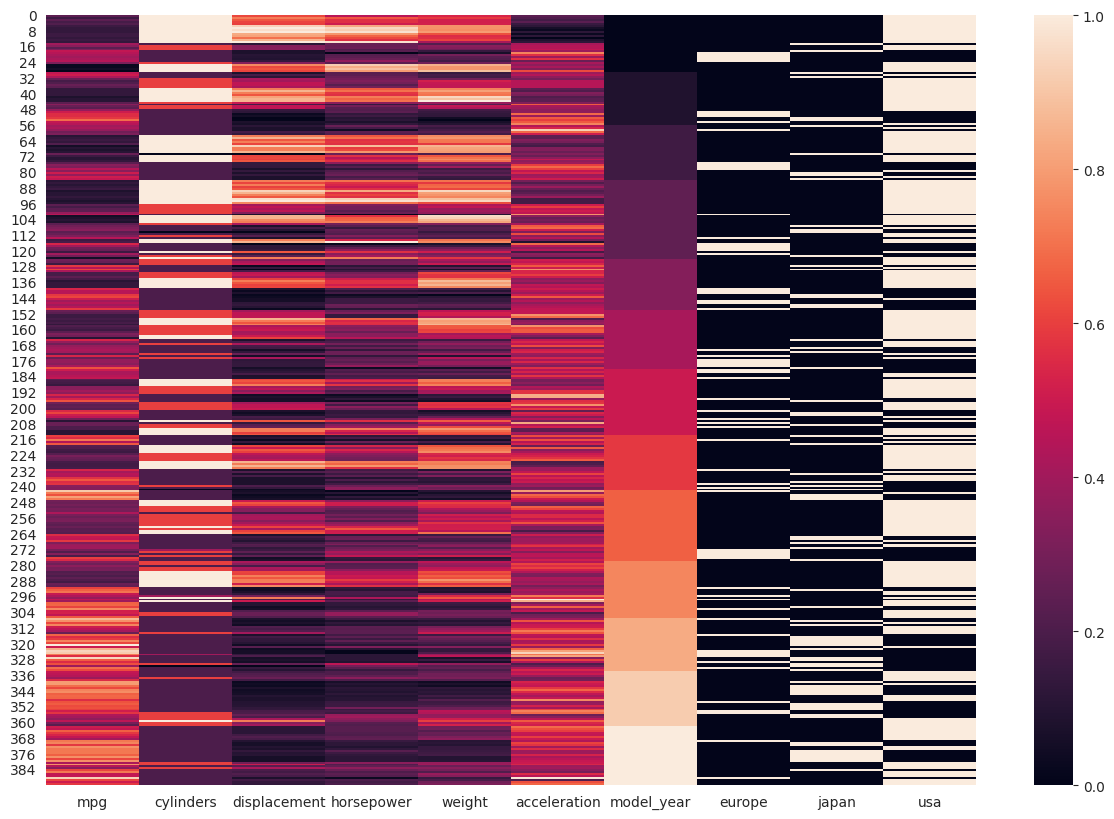

In [39]:
plt.figure(figsize=(15, 10))
sns.heatmap(pd.DataFrame(df_scaled, columns=df_w_dummies.columns))
plt.show()

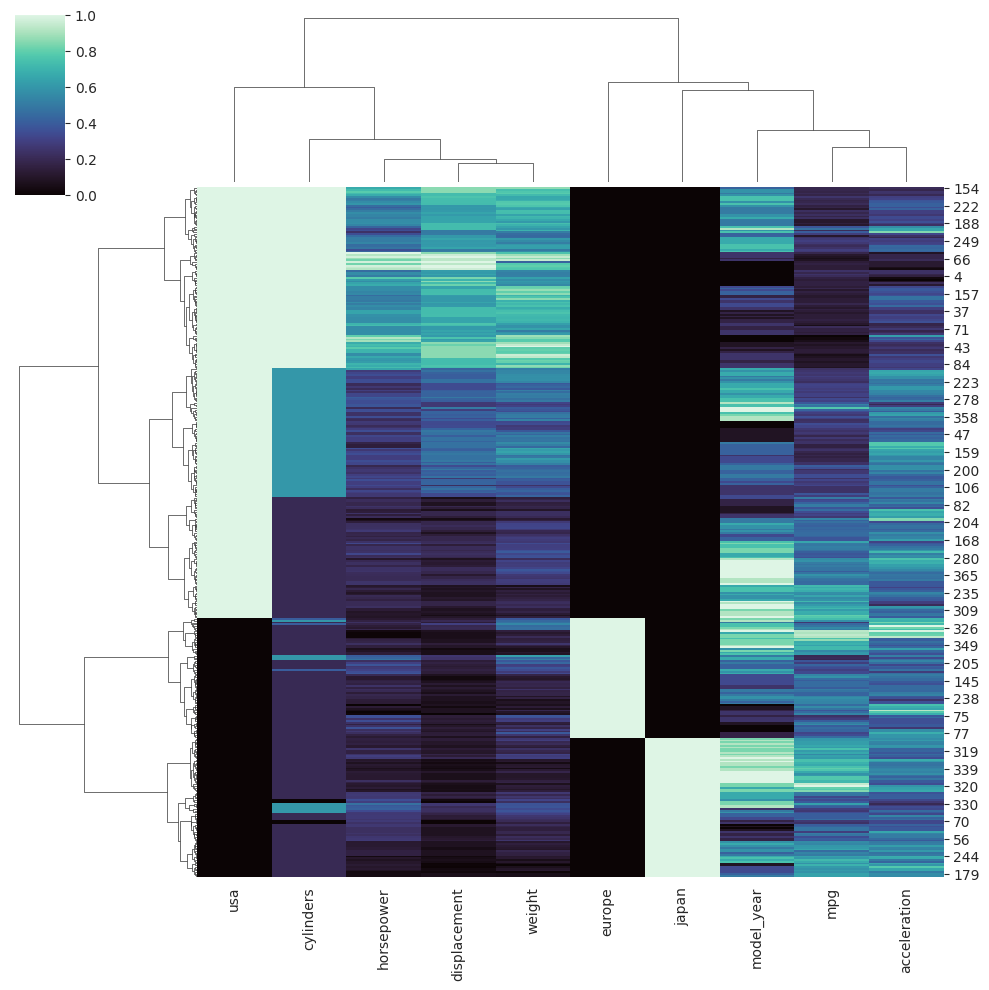

In [40]:
sns.clustermap(pd.DataFrame(df_scaled, columns=df_w_dummies.columns), method='ward', cmap='mako')
plt.show()

In [41]:
from sklearn.cluster import AgglomerativeClustering

In [42]:
model = AgglomerativeClustering(n_clusters=4)

In [43]:
df_scaled

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

In [44]:
cluster_labels = model.fit_predict(df_scaled)

In [45]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

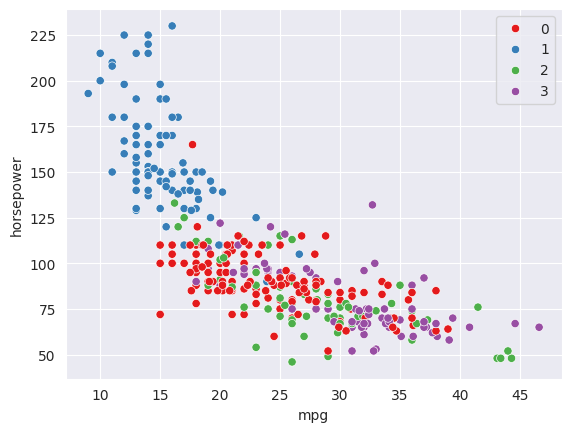

In [46]:
sns.scatterplot(
    data=df,
    x='mpg',
    y ='horsepower',
    hue=cluster_labels,
    palette=sns.color_palette('Set1', 4)
)
plt.show()

In [47]:
N_features = len(pd.DataFrame(df_scaled, columns=df_w_dummies.columns).columns)

In [48]:
# Max distance between clusters
max_distance = np.sqrt(N_features)

In [49]:
max_distance

3.1622776601683795

## N_Cluster = None, distance_threshold = 0

In [50]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

In [51]:
cluster_labels = model.fit_predict(df_scaled)

In [52]:
cluster_labels

array([247, 252, 360, 302, 326, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 289, 305, 383,
       290, 205, 355, 269, 202, 144, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 253, 168, 378, 331, 201, 268, 256, 361,
       250, 197, 246, 371, 324, 230, 203, 261, 380, 376, 308, 389, 332,
       306, 236, 391, 350, 274, 288, 313, 231, 298, 100, 295, 210, 248,
       187, 390, 373, 266, 307, 379, 212, 357, 191, 314, 208, 249, 343,
       294, 374, 322, 323, 362, 188, 296, 369, 286, 251, 229, 244, 285,
       349, 365, 259, 213, 276, 215, 222, 204, 359, 287, 166, 387, 291,
       220, 216, 260, 129, 367, 340, 346, 301, 342, 228, 388, 370, 218,
       255, 327, 347, 278, 271, 258, 282, 318, 273, 123, 172, 382, 363,
       356, 195, 280, 239, 364, 267, 351, 186, 257, 277, 299, 127, 366,
       234, 385, 192, 372, 292, 233, 270, 263, 133, 165, 161, 198,  97,
       315, 134, 207, 147, 175, 262, 348,  98, 214,  48, 353, 17

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [54]:
linkage_matrix = linkage(df_scaled, method='ward')

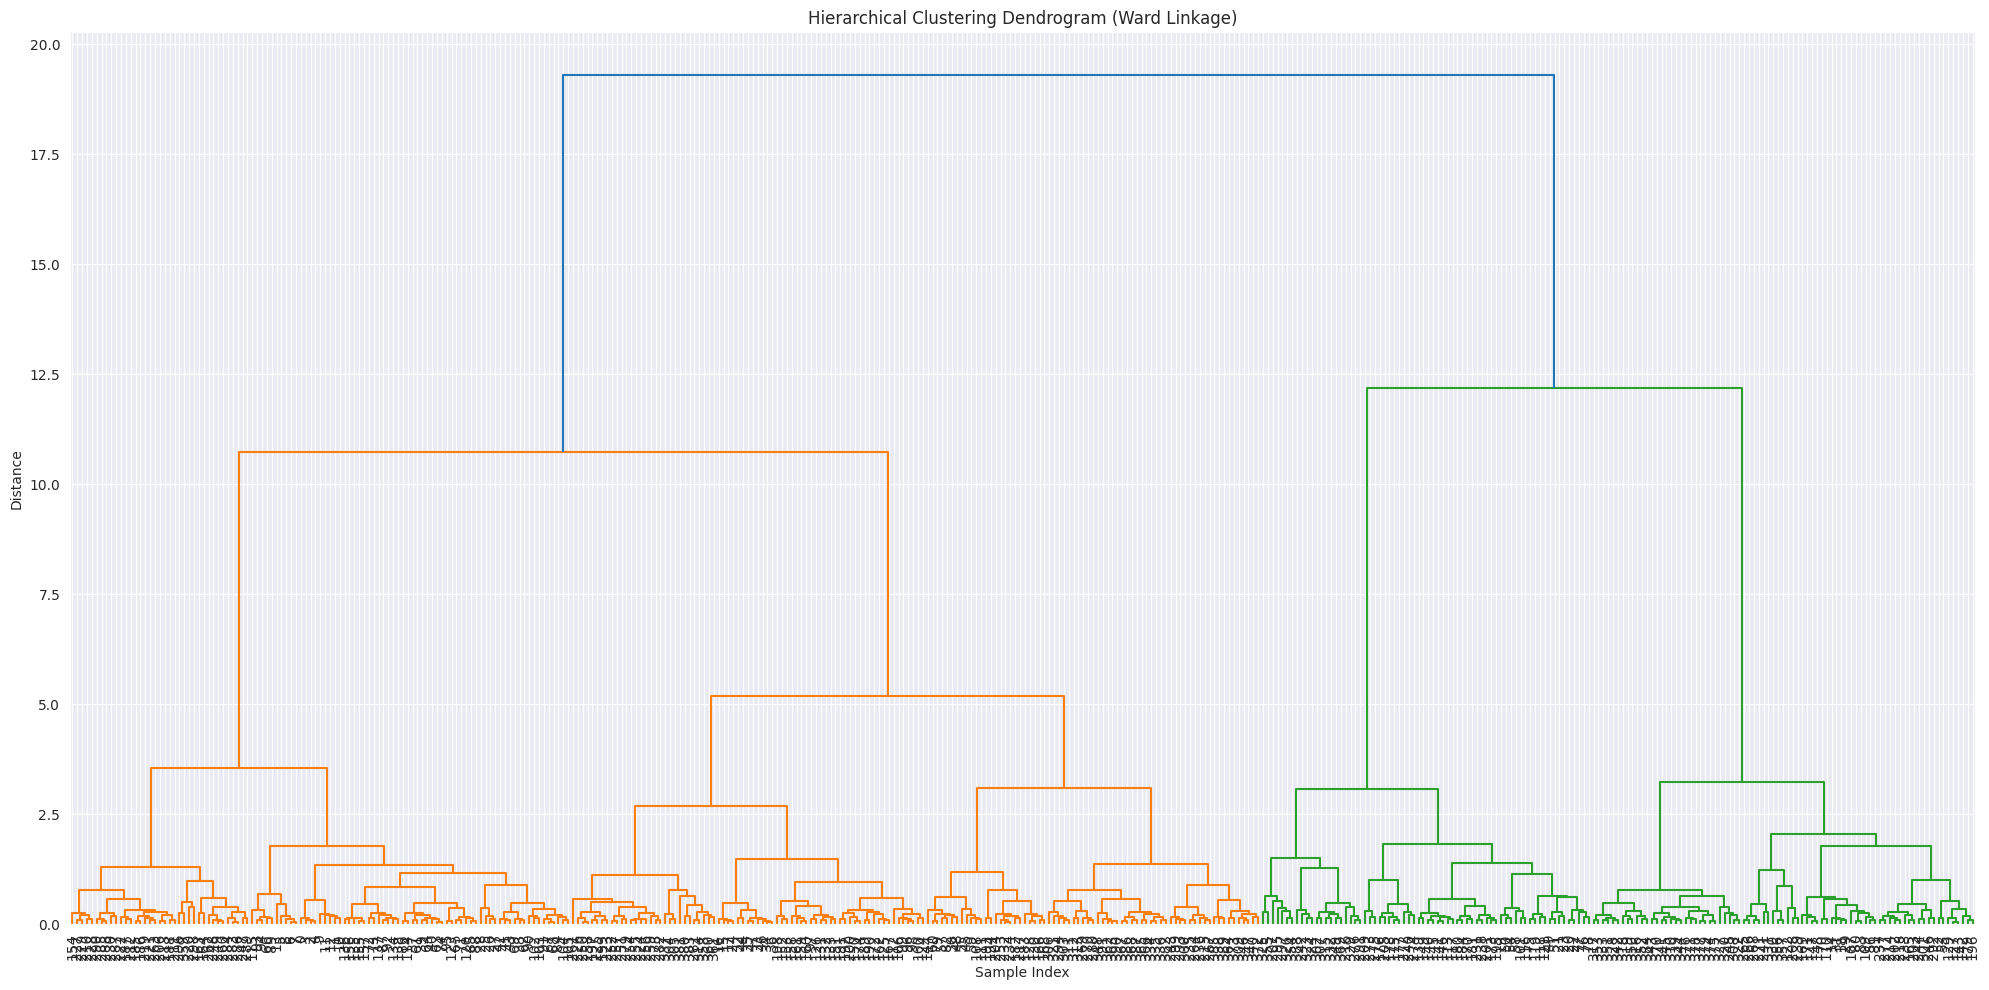

In [62]:
plt.figure(figsize=(20, 10))
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=10.)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid(True)
plt.tight_layout()
plt.show()
